<a href="https://colab.research.google.com/github/21-501/ds1/blob/main/i5code_blackfridaysales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**
A retail company wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

Importing Libraries and Loading data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
upload=files.upload()

Saving BlackFridaySales.csv to BlackFridaySales.csv


In [ ]:
data = pd.read_csv('BlackFridaySales.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
data.shape

(550068, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [ ]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [ ]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [ ]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

<ipython-input-15-e1ff3dc92f46>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Purchase"],color='r')


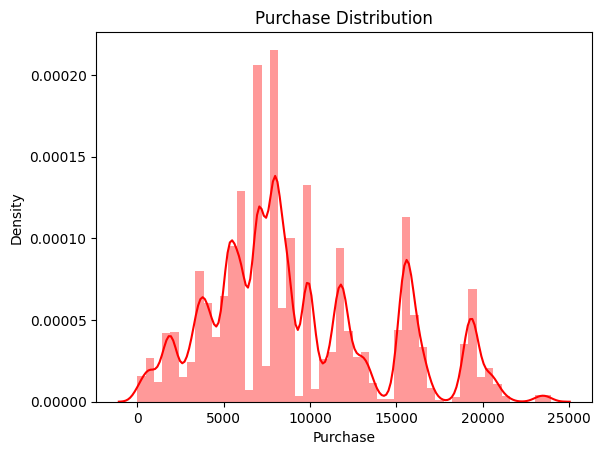

In [ ]:
sns.distplot(data["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

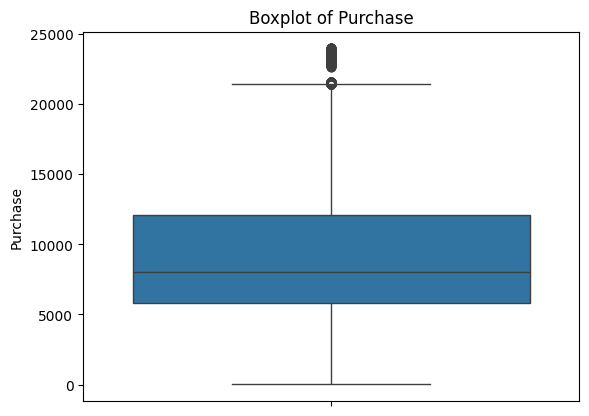

In [ ]:
sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [ ]:
data["Purchase"].skew()

0.6001400037087128

In [ ]:
data["Purchase"].kurtosis()

-0.3383775655851702

In [ ]:
data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

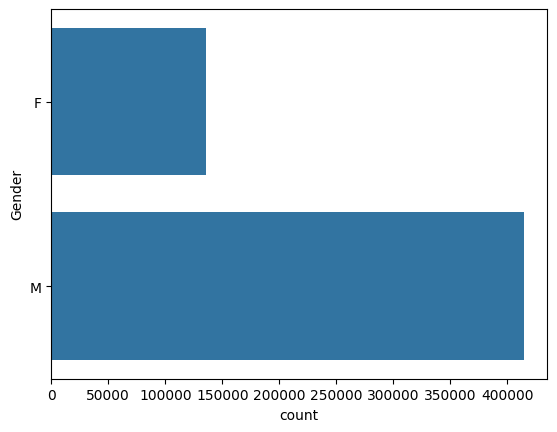

In [ ]:

sns.countplot(data['Gender'])
plt.show()

In [ ]:
data['Gender'].value_counts(normalize=True)*100

Gender
M    75.310507
F    24.689493
Name: proportion, dtype: float64

In [ ]:
import pandas as pd
# Handle missing values in 'Product_Category_2' and 'Product_Category_3'
data = pd.read_csv('BlackFridaySales.csv')
data['Product_Category_2'] = data['Product_Category_2'].fillna(0).astype('int64')
data['Product_Category_3'] = data['Product_Category_3'].fillna(0).astype('int64')



In [ ]:
# Verify the changes
print(data.isnull().sum())
print(data.dtypes)

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64
User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object


In [ ]:
# Assuming 'data' is your DataFrame and it has columns 'Gender' and 'Purchase'
mean_purchase_by_gender = data.groupby("Gender")["Purchase"].mean()

# Display the result
print(mean_purchase_by_gender)


Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


MARITAL STATUS

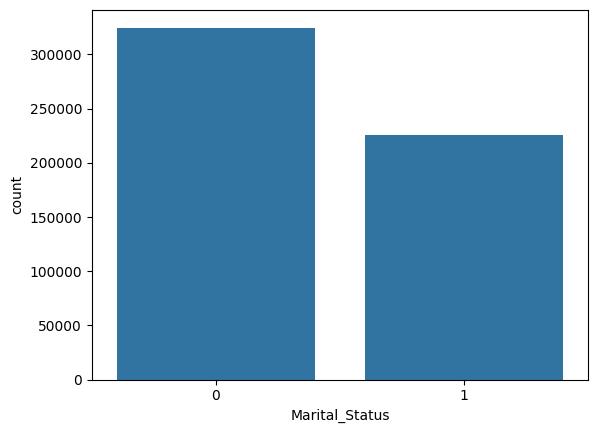

In [ ]:
# Check if 'Marital_Status' column exists in the DataFrame
if 'Marital_Status' in data.columns:
    # Create the count plot
    sns.countplot(x='Marital_Status', data=data)
    plt.show()
else:
    print("The column 'Marital_Status' does not exist in the DataFrame.")


In [ ]:
# Convert 'Purchase' to numeric, forcing errors to NaN
data['Purchase'] = pd.to_numeric(data['Purchase'], errors='coerce')

# Fill NaN values in 'Purchase' with the mean of the column
data['Purchase'].fillna(data['Purchase'].mean(), inplace=True)

# Confirm there are no NaN values left
print(data['Purchase'].isna().sum())

# Check if 'Marital_Status' column exists and calculate the mean of 'Purchase'
if 'Marital_Status' in data.columns:
    marital_status_purchase_mean = data.groupby('Marital_Status')['Purchase'].mean()
    print(marital_status_purchase_mean)
else:
    print("The 'Marital_Status' column does not exist in the DataFrame.")

0
Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64


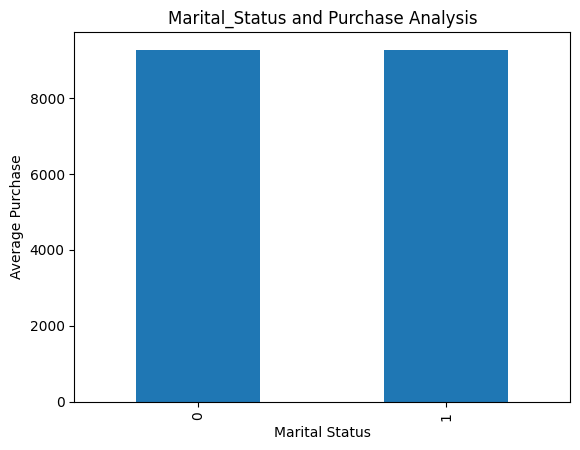

In [ ]:
 # Plotting
marital_status_purchase_mean.plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.xlabel("Marital Status")
plt.ylabel("Average Purchase")
plt.show()


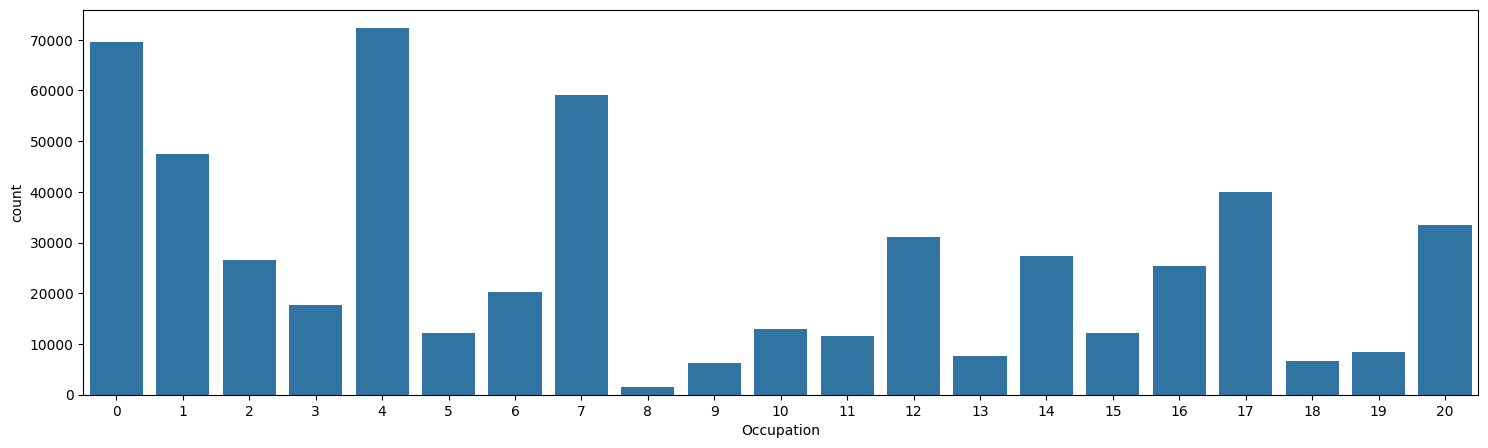

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 5))
sns.countplot(x='Occupation', data=data)
plt.show()


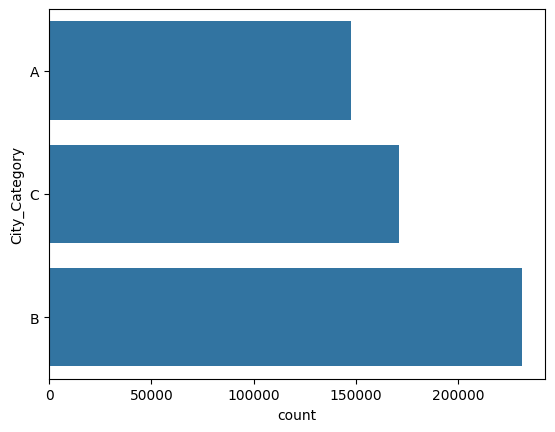

In [17]:
sns.countplot(data['City_Category'])
plt.show()

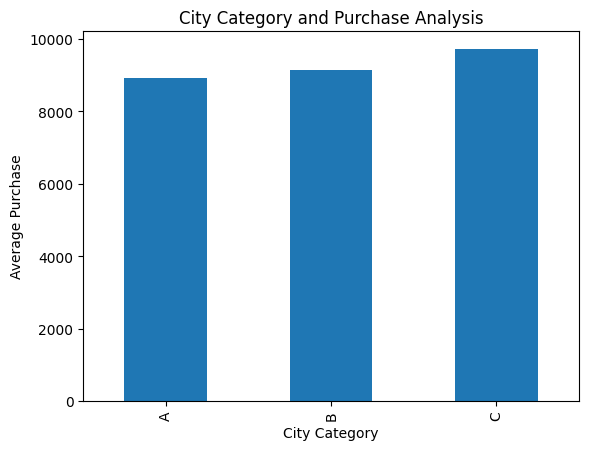

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('BlackFridaySales.csv')

# Group by 'City_Category' and calculate the mean of 'Purchase'
mean_purchase_by_city = data.groupby("City_Category")["Purchase"].mean()

# Plot the results
mean_purchase_by_city.plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.xlabel("City Category")
plt.ylabel("Average Purchase")
plt.show()


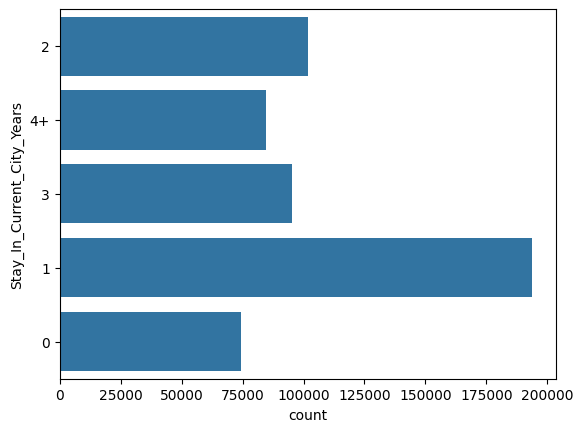

In [20]:

sns.countplot(data['Stay_In_Current_City_Years'])
plt.show()

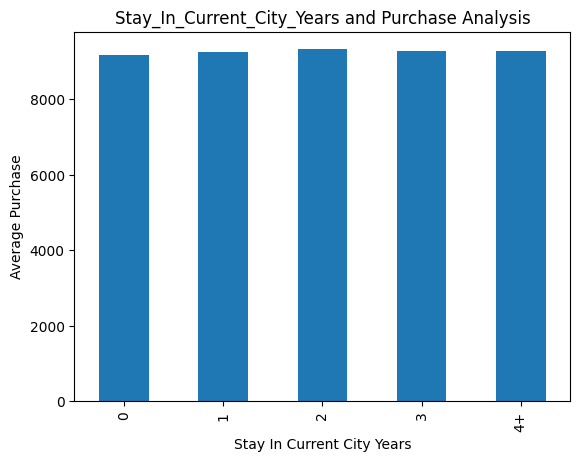

In [22]:
# Group by 'Stay_In_Current_City_Years' and calculate the mean of 'Purchase'
mean_purchase_by_stay = data.groupby("Stay_In_Current_City_Years")["Purchase"].mean()

# Plot the results
mean_purchase_by_stay.plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.xlabel("Stay In Current City Years")
plt.ylabel("Average Purchase")
plt.show()

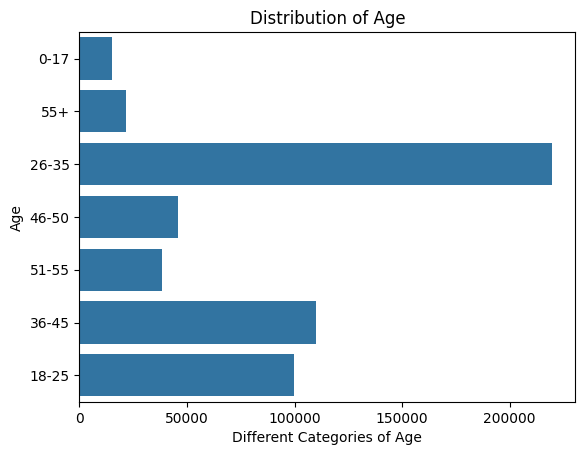

In [23]:
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

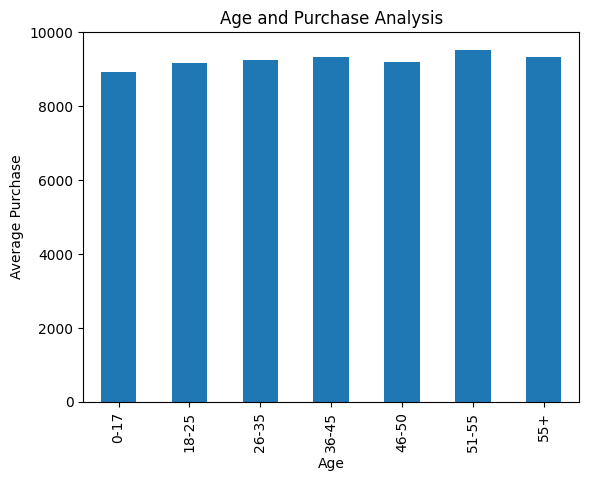

In [25]:
# Group by 'Age' and calculate the mean of 'Purchase'
mean_purchase_by_age = data.groupby("Age")["Purchase"].mean()

# Plot the results
mean_purchase_by_age.plot(kind='bar')
plt.title("Age and Purchase Analysis")
plt.xlabel("Age")
plt.ylabel("Average Purchase")
plt.show()

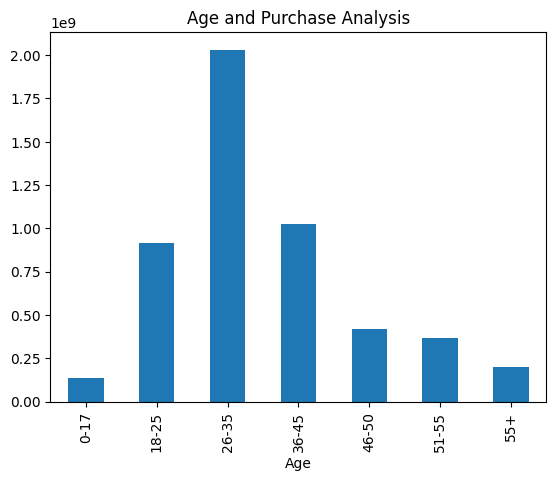

In [26]:
data.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

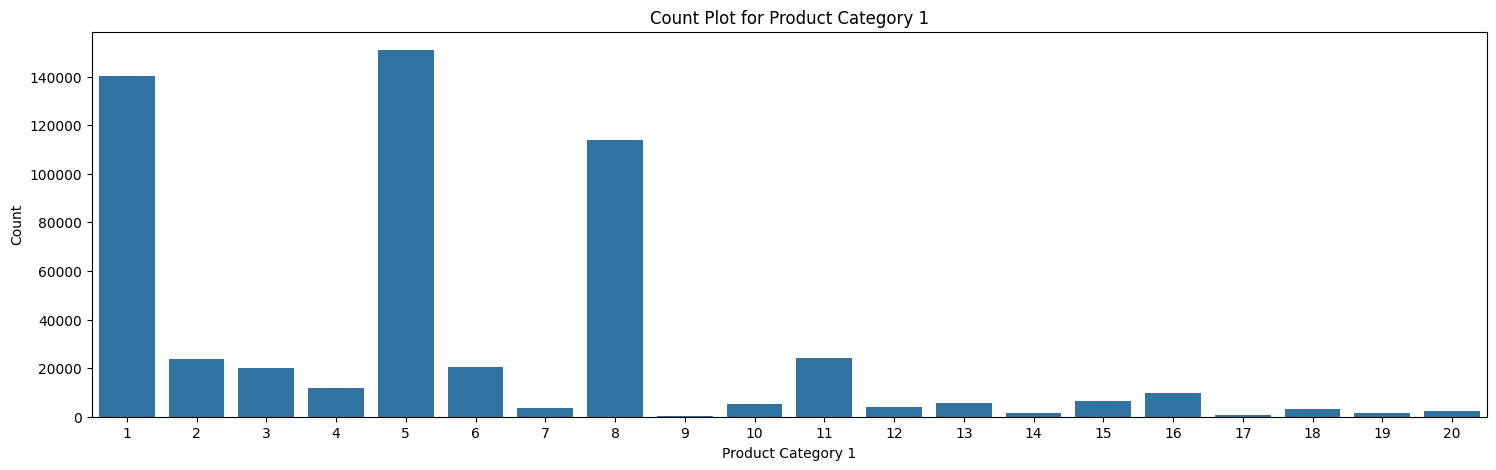

In [4]:
data = pd.read_csv('BlackFridaySales.csv')
plt.figure(figsize=(18,5))
sns.countplot(x='Product_Category_1', data=data)
plt.title("Count Plot for Product Category 1")
plt.xlabel("Product Category 1")
plt.ylabel("Count")
plt.show()


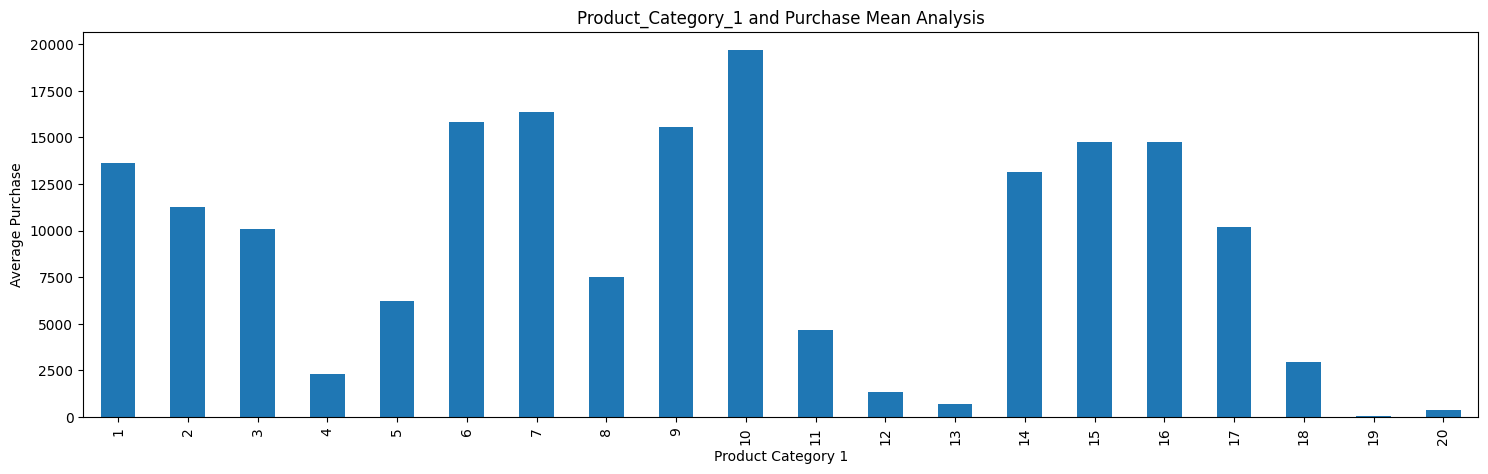

In [5]:
import matplotlib.pyplot as plt

# Group by 'Product_Category_1' and calculate the mean of 'Purchase'
mean_purchase_by_category = data.groupby('Product_Category_1')['Purchase'].mean()

# Plot the results
mean_purchase_by_category.plot(kind='bar', figsize=(18, 5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.xlabel("Product Category 1")
plt.ylabel("Average Purchase")
plt.show()


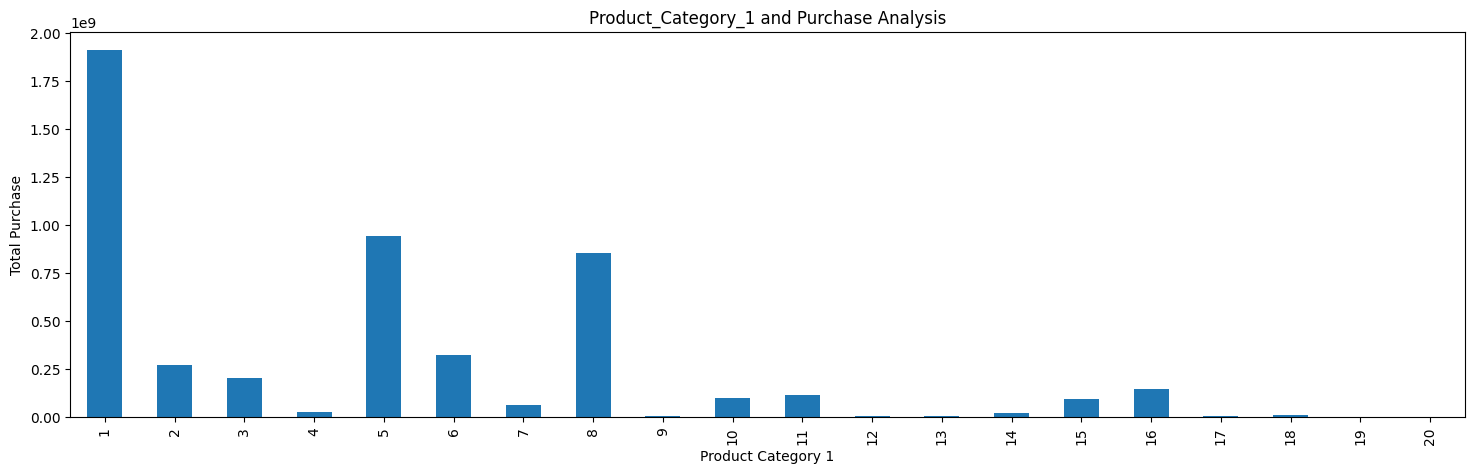

In [6]:
# Group by 'Product_Category_1' and calculate the sum of 'Purchase'
sum_purchase_by_category = data.groupby('Product_Category_1')['Purchase'].sum()

# Plot the results
sum_purchase_by_category.plot(kind='bar', figsize=(18, 5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.xlabel("Product Category 1")
plt.ylabel("Total Purchase")
plt.show()

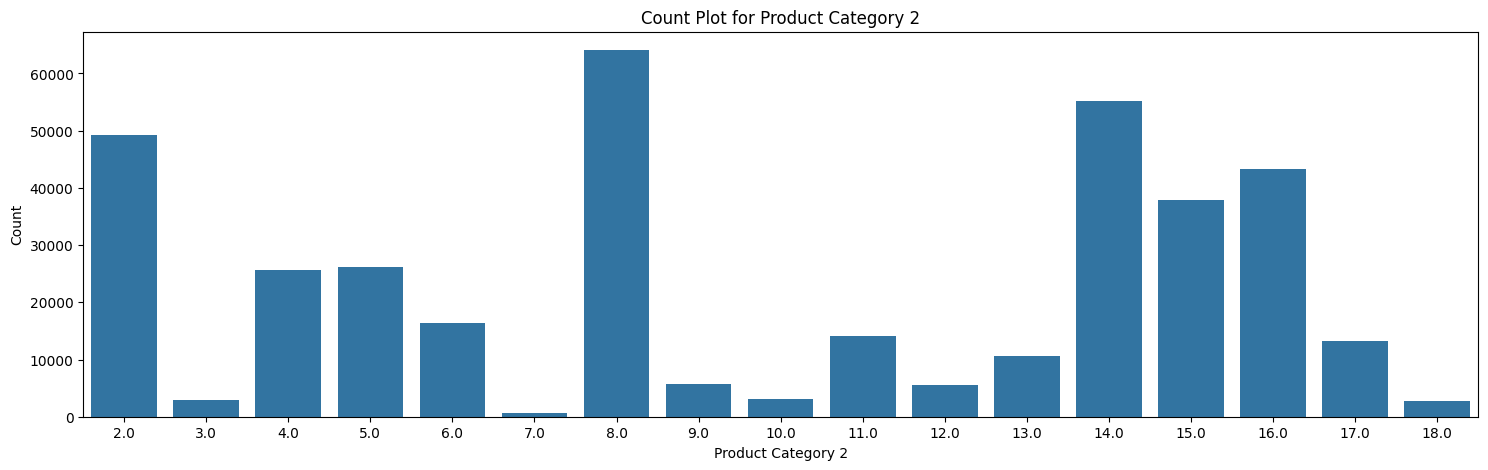

In [5]:
# Plotting the count plot for 'Product_Category_2'
plt.figure(figsize=(18, 5))
sns.countplot(x='Product_Category_2', data=data)
plt.title("Count Plot for Product Category 2")
plt.xlabel("Product Category 2")
plt.ylabel("Count")
plt.show()

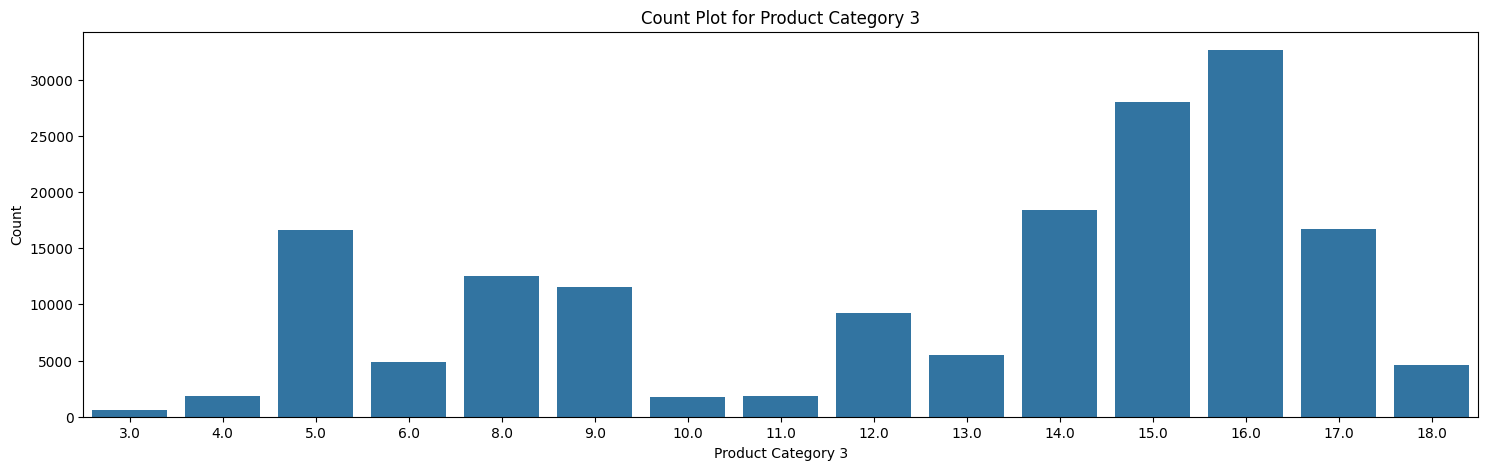

In [9]:
# Plotting the count plot for 'Product_Category_3'
plt.figure(figsize=(18, 5))
sns.countplot(x='Product_Category_3', data=data)
plt.title("Count Plot for Product Category 3")
plt.xlabel("Product Category 3")
plt.ylabel("Count")
plt.show()

In [8]:
corr_matrix

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


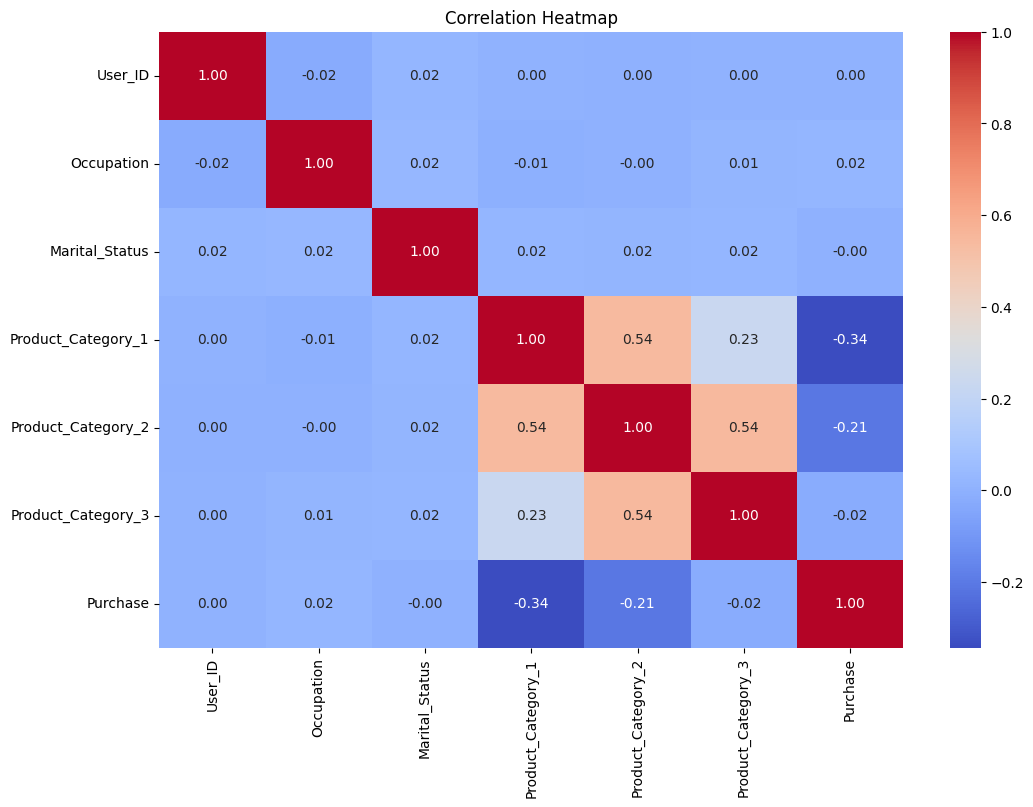

In [7]:
data = pd.read_csv('BlackFridaySales.csv')

# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=['int', 'float'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [4]:
data = pd.read_csv('BlackFridaySales.csv')
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [10]:
df = data.copy()

In [11]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
#Dummy Variables:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

**Encoding the categorical variables**

In [13]:

from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [14]:

df['Gender'] = lr.fit_transform(df['Gender'])

In [15]:

df['Age'] = lr.fit_transform(df['Age'])

In [16]:
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [17]:

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,0,10,0,0,3,NaN,NaN,8370,False,False,True,False,False
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,False,False,True,False,False
2,1000001,P00087842,0,0,10,0,0,12,NaN,NaN,1422,False,False,True,False,False
3,1000001,P00085442,0,0,10,0,0,12,14.0,NaN,1057,False,False,True,False,False
4,1000002,P00285442,1,6,16,2,0,8,NaN,NaN,7969,False,False,False,False,True


In [18]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [19]:

df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   User_ID                        550068 non-null  int64 
 1   Product_ID                     550068 non-null  object
 2   Gender                         550068 non-null  int64 
 3   Age                            550068 non-null  int64 
 4   Occupation                     550068 non-null  int64 
 5   City_Category                  550068 non-null  int64 
 6   Marital_Status                 550068 non-null  int64 
 7   Product_Category_1             550068 non-null  int64 
 8   Product_Category_2             550068 non-null  int64 
 9   Product_Category_3             550068 non-null  int64 
 10  Purchase                       550068 non-null  int64 
 11  Stay_In_Current_City_Years_0   550068 non-null  bool  
 12  Stay_In_Current_City_Years_1   550068 non-nu


**Dropping the irrelevant columns **

In [21]:
df = df.drop(["User_ID","Product_ID"],axis=1)

**Splitting data into independent and dependent variables**

In [22]:

X = df.drop("Purchase",axis=1)

In [23]:
y=df['Purchase']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#Modeling
Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
lr.intercept_

9536.400764131593

In [28]:
lr.coef_

array([ 465.82318446,  112.36643445,    5.05508596,  314.06766138,
        -58.23217776, -348.4514785 ,   12.98415047,  143.49190467,
        -20.83796687,    5.4676518 ,   17.68367185,   -3.96751734,
          1.65416056])

In [29]:
y_pred = lr.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [31]:
mean_absolute_error(y_test, y_pred)

3532.069226165843

In [32]:
mean_squared_error(y_test, y_pred)

21397853.26940751

In [33]:
r2_score(y_test, y_pred)

0.15192944521481688

In [34]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4625.781368526566


# DecisionTreeRegressor

In [35]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

In [36]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [37]:
dt_y_pred = regressor.predict(X_test)

In [38]:
mean_absolute_error(y_test, dt_y_pred)

2372.0357559134654

In [39]:
mean_squared_error(y_test, dt_y_pred)

11300579.466797074

In [40]:
r2_score(y_test, dt_y_pred)

0.5521191505924365

In [41]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Linear Regression Model is  3361.633452177241


# Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object
RFregressor = RandomForestRegressor(random_state = 0)

In [43]:
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [44]:
rf_y_pred = RFregressor.predict(X_test)

In [45]:
mean_absolute_error(y_test, rf_y_pred)

2222.049109204734

In [46]:
mean_squared_error(y_test, rf_y_pred)

9310769.87311957

In [47]:
r2_score(y_test, rf_y_pred)

0.6309821516972987

In [48]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Linear Regression Model is  3051.35541573242


# XGBoost Regressor

In [49]:
from xgboost.sklearn import XGBRegressor

In [50]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
xgb_y_pred = xgb_reg.predict(X_test)

In [52]:
mean_absolute_error(y_test, xgb_y_pred)

2141.713511241279

In [53]:
mean_squared_error(y_test, xgb_y_pred)

8241184.08588845

In [54]:
r2_score(y_test, xgb_y_pred)

0.6733735168752393

In [55]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of Linear Regression Model is  2870.7462594051135
